# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


**Цель исследования:**

1. Определить рыночную стоимость объектов недвижимости.
2. Установить какие факторы больше всего влияют на общую (полную) стоимость квартир.
3. Изучить как быстро продавались квартиры.

**Ход исследования:**

Данные о недвижимости я получу из файла '/datasets/real_estate_data.csv'. О качестве данных ничего не известно. Поэтому перед тем,как приступать к целям исследования, понадобится обзор и предобработка данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.

Таким образом, моё исследование пройдёт в восемь этапов:
- Обзор данных;
- Предобработка данных;
- Расчеты и добавление результатов в таблицу;
- Проведение анализа параметров объектов;
- Изучение как быстро продавались квартиры;
- Изучение какие факторы больше всего влияют на общую (полную) стоимость объекта;
- Определение населённых пунктов с самой высокой и низкой стоимостью квадратного метра (в 10 населённых пунктах с наибольшим числом объявлений);
- Установление зависимости - как стоимость объектов зависит от расстояния до центра города.

<div class="alert alert-info"> <b></b> Добавила цель и ход исследования выше ↑.</div>

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
#выведем размеры датафрейма на экран:
print('Количество строк в датафрейме:', data.shape[0],'\nКоличество столбцов в датафрейме: ', data.shape[1])

Количество строк в датафрейме: 23699 
Количество столбцов в датафрейме:  22


In [3]:
#выведем основную информацию о датафрейме на экран:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#выведем первые 20 строчек датафрейма на экран:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#проверим есть ли дубликаты строк в датафрейме:
print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


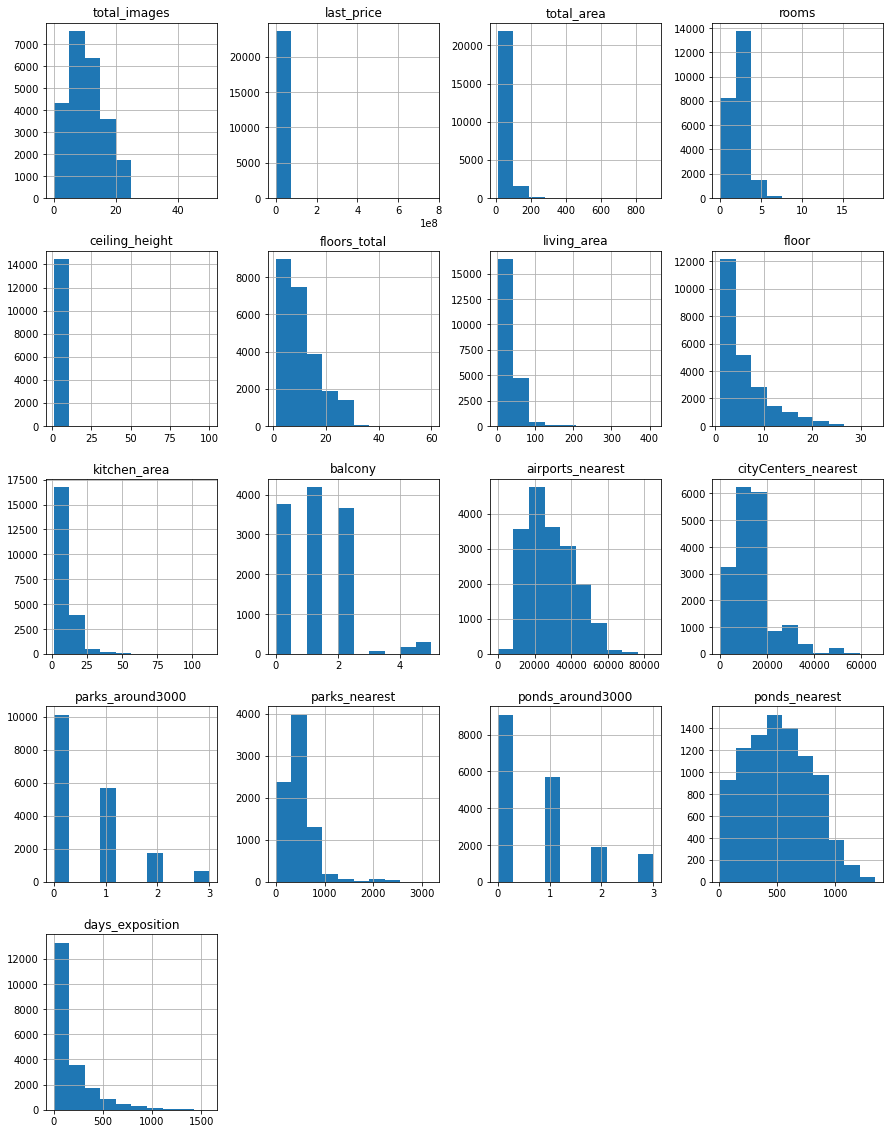

In [6]:
#построим общую гистограмму для всех числовых столбцов датафрейма:
data.hist(figsize=(15, 20))
plt.show()

In [7]:
#выведем на экран характеристики, дающие представление о выборке методом describe():
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В таблице 23699 строки, дубликаты строк отсутствуют. Во многих столбцах есть пропущенные значения, нулевые значения и некорректный тип данных. Также можно заметить аномальные значения. Займемся этим в следующем блоке "Предобработка данных".

## Предобработка данных

**Наименование столбцов**
*(для собственного удобства))*

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [8]:
#выведем количество пропущенных значений для каждого столбца: 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#выведем количество пропущенных значений для каждого столбца в процентах и округлим до 1 знака после запятой:
round((data.isna().mean()*100),1)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
cityCenters_nearest     23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

In [10]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Обработаем пропуски в столбцах - посмотрим как в определенном столбце логичнее их заменить, удалить, либо вообще оставить как есть:**

 1. *ceiling_height* - высота потолков: было пропущено 38,8% значений, при этом часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.). Необходимо добавить условие на ручной ввод: высота потолков не может быть двузначной величиной, а также меньше 2 м (в данных существуют значения в 1,75 м и даже в 1 м). Все пропущенные значения обработаны: была сделана замена на медиану.
 
2. *floors_total* - число этажей в доме: пропущено 0,4% значений. Обработали пропущенные значения по принципу:

- если значение *floor* 1-5 то это 5-ти этажка (так как 5-ти этажки достаточно распространенные);
- если значение *floor* 6-9 то это 9-ти этажка (так как 9-ти этажки достаточно распространенные);
- если значение *floor* 10-12 то это 12-ти этажка (так как 12-ти этажки достаточно распространенные);
- если значение *floor* 13-16 то это 16-ти этажка (так как 16-ти этажки достаточно распространенные);

- все что выше - приравняли *floors_total* к *floor*:

3. *living_area* - жилая площадь и *kitchen_area* - площадь кухни: пропущено 7,9% и 9,4% значений соответственно. Заменили медианой пустые значения в жилой площади, в зависимости от количества комнат, а для площади кухни рассчитали среднюю пропорцию площади кухни по каждой локации. Далее для пустых значений рассчитали площадь кухни по общей площади умноженной на полученную пропорцию.

4. *balcony* - число балконов: пропущено 48,6% значений. Предполагается, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю.

5. *locality_name* - название населенного пункта: пропущено 0,2% значений. Все строки с пропущенными значениями удалены, т.к. этот параметр невозможно восстановить и заполнить любым численным методом (медиана, среднее). К тому же пропусков в данном столбце всего 0,2%, что не повлияет на общие выводы исследования.

6. *cityCenters_nearest* - расстояние до центра города: пропущено 23,3% значений. Поскольку данный параметр является картографическим, мы не имеем возможности заполнить пропуски, оставим данные пропущенные значения без изменений.

7. *is_apartment* - апартаменты: пропущено 88,3%, скорее всего продавец пропускал этот пункт, если квартира НЕ апартаменты.

8. *airports_nearest* - расстояние до ближайшего аэропорта, *parks_nearest* - расстояние до ближайшего парка, *ponds_nearest* - расстояние до ближайшего водоема: пропущенные значения в этих признаках оставлены без изменений, так как это картографические параметры.

9. *parks_around3000* - число парков в радиусе 3 км и *ponds_around3000* - число водоемов в радиусе 3 км  заполним значениями 0, т.к. вероятнее всего, если продавец не заполнил эти данные, то в радиусе 3 км нет водоемов и парков.

10. *days_exposition* - длительность размещения объявления: пропущено 13,5% значений. Все пропущенные значения были заменены на медиану.

In [11]:
#удаляем строки с Nan в столбце locality_name:
data = data.dropna(subset=['locality_name'])
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23646,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23647,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23648,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [12]:
#проверим все ли строки с пропусками в столбце locality_name удалены:
print('Пропущенных значений в столбце locality_name:', data['locality_name'].isna().sum())

Пропущенных значений в столбце locality_name: 0


In [13]:
data['floors_total'].value_counts(dropna=False)

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
NaN       85
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

In [14]:
#посмотрим какие значения floor соответствуют пропущенным значениям в floors_total:
data[data['floors_total'].isna()].value_counts('floor')

floor
4     9
6     9
8     8
12    6
9     5
3     4
5     4
7     4
21    4
15    3
19    3
18    3
1     3
13    3
11    3
10    3
14    2
2     2
20    2
24    2
17    1
22    1
23    1
dtype: int64

In [15]:
#или так):
data[data['floors_total'].isna()].groupby('floor')['floor'].agg('count')

floor
1     3
2     2
3     4
4     9
5     4
6     9
7     4
8     8
9     5
10    3
11    3
12    6
13    3
14    2
15    3
17    1
18    3
19    3
20    2
21    4
22    1
23    1
24    2
Name: floor, dtype: int64

**Заполним пропуски в зависимости от столбца "floor" по принципу:**

- если значение floor 1-5 то это 5-ти этажка (так как 5-ти этажки достаточно распространенные);
- если значение floor 6-9 то это 9-ти этажка (так как 9-ти этажки достаточно распространенные);
- если значение floor 10-12 то это 12-ти этажка (так как 12-ти этажки достаточно распространенные);
- если значение floor 13-16 то это 16-ти этажка (так как 16-ти этажки достаточно распространенные);

все что выше будем - приравняем floors_total к floor:

In [16]:
#создадим функцию для заполнения столбца floors_total в зависимости от floor:
def determine_floors_total(line):
    total_floors = line['floors_total']
    floor = line['floor']
    if 1<=floor<=5:
        return 5
    elif 6<=floor<=9:
        return 9
    elif 10<=floor<=12:
        return 12
    elif 13<=floor<=16:
        return 16
    else:
        return floor
data.loc[data.query('floors_total.isna()').index, 'floors_total'] = data.apply(determine_floors_total, axis=1)
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [17]:
#проверим все ли пропуски floors_total в столбце мы заменили:
print('Пропущенных значений в столбце floors_total:', data['floors_total'].isna().sum())

Пропущенных значений в столбце floors_total: 0


In [18]:
#посмотрим уникальные значения в столбце с наименованиями населенных пунктов 'locality_name' и посчитаем их количество:
print(data['locality_name'].unique())
print('Количество уникальных населенных пунктов:', len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

**В столбце locality_name видим неявные дубликаты,это обусловлено несколькими проблемами:**
1. Различие в названиях только в букве 'ё' ('поселок' и 'посёлок');
2. Наименование 'поселок' и 'поселок городского типа' с тем же названием - очевидно это один и тот же населенный пункт;
3. Наименование населенного пункта без указания вида населенного пункта и тот же населенный пункт с видом населенного пункта (Мурино и поселок Мурино).

In [19]:
#заменим в наименования населеднных пунктов 'посёлок' на 'поселок':
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].str.replace('Мурино', 'поселок Мурино')

In [20]:
#посчитаем количество уникальных населенных пунктов после замены всех неявных дубликатов:
print('Количество уникальных населенных пунктов:', len(data['locality_name'].unique()))

Количество уникальных населенных пунктов: 329


In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок поселок Мурино', 'Ломоносов',
       'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар',
       'Колпино', 'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Но

In [22]:
#выведем на экран характеристики для столбца ceiling_height (высота потолков (м)) методом describe():
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолков относится к типу данных, внесенных пользователем, поэтому имеет место человеческий фактор - ошибки при вводе числа или ввод в другой системе единиц, либо человек может не знать высоту потолка, поэтому пропускают этот параметр.
Видим, что min=1, max=100. Это выбросы. Будем заполнять пропущенные значения медианой, так как она наименее чувствительна к выбросам.

In [23]:
#выведем уникальные значения столбца ceiling_height в диапазоне >=6 и <2:
data[(data['ceiling_height']>=6)|(data['ceiling_height']<2)]['ceiling_height'].unique()

array([ 25.  ,  32.  ,   8.  ,  27.  ,  24.  ,  26.  ,   1.2 ,   8.3 ,
        14.  ,   1.75,  20.  ,   6.  ,  22.6 ,  27.5 ,  10.3 ,   1.  ,
       100.  ])

Логично предположить, что это ошибки ввода данных. Исправим это там, где возможно:

In [24]:
#явно высота потолков более 10 м это ошибка в заполнении данных. Поэтому все значения > 19м нужно поделить на 10:
def ceiling_height_more(row):
    if row['ceiling_height'] > 19:
        return row['ceiling_height'] * 0.1
    else:
        return row['ceiling_height']

In [25]:
# присваиваем новые значения:
data['ceiling_height'] = data.apply(ceiling_height_more, axis=1)

In [26]:
data[(data['ceiling_height']>=6)|(data['ceiling_height']<2)]['ceiling_height'].unique()

array([ 8.  ,  1.2 ,  8.3 , 14.  ,  1.75,  6.  , 10.3 ,  1.  , 10.  ])

Заменим оставшиеся аномальные значения, а также пропуски медианными значениями относительно своего района и этажности:

In [27]:
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [28]:
data['ceiling_height'].unique()

array([ 2.7  ,  2.65 ,  2.6  ,  3.03 ,  2.75 ,  2.5  ,  2.67 ,  2.55 ,
        2.56 ,  3.05 ,  3.   ,  2.9  ,  2.8  ,  2.76 ,  3.2  ,  2.645,
        2.61 ,  2.54 ,  3.15 ,  3.25 ,  3.45 ,  2.77 ,  2.85 ,  2.525,
        2.64 ,  2.57 ,  4.15 ,  3.5  ,  3.3  ,  2.71 ,  4.   ,  2.47 ,
        2.73 ,  2.84 ,  3.1  ,  2.675,  2.34 ,  3.4  ,  2.52 ,  3.06 ,
        2.72 ,  2.51 ,  2.78 ,  2.725,  2.58 ,  3.7  ,  5.2  ,  2.575,
        2.87 ,  2.66 ,  2.775,  2.59 ,  2.   ,  2.45 ,  3.6  ,  5.   ,
        2.92 ,  3.11 ,  3.13 ,  2.735,  3.8  ,  3.55 ,  3.16 ,  3.62 ,
        3.12 ,  2.53 ,  2.565,  2.74 ,  2.96 ,  2.46 ,  5.3  ,  2.79 ,
        2.95 ,  4.06 ,  2.94 ,  3.82 ,  3.54 ,  3.53 ,  2.83 ,  3.325,
        2.625,  4.7  ,  2.4  ,  3.38 ,  3.01 ,  5.6  ,  2.65 ,  3.65 ,
        3.9  ,  3.18 ,  3.35 ,  2.3  ,  3.57 ,  2.48 ,  2.62 ,  2.82 ,
        3.98 ,  2.63 ,  3.83 ,  2.715,  3.52 ,  3.95 ,  3.75 ,  2.88 ,
        3.67 ,  3.87 ,  3.66 ,  3.85 ,  3.86 ,  4.19 ,  3.24 ,  4.8  ,
      

In [29]:
#построим сводную таблицу по насленному пункту, количествам комнат и жилой площади:
data_pivot_living_area = data.pivot_table(index='rooms', values='living_area', aggfunc='median')
data_pivot_living_area.head()

,living_area
rooms,
0,18.0
1,17.6
2,30.5
3,45.0
4,63.8


In [30]:
#заменим медианой пустые значения в жилой площади, в зависимости от количества комнат:
for room in data['rooms'].unique():
    median_living_area = data.loc[data['rooms']==room, 'living_area'].median()
    data.loc[(data['living_area'].isna()) &
        (data['rooms']==room), 'living_area'] = median_living_area

Рассчитаем среднюю пропорцию площади кухни *kitchen_area* по каждой локации. Далее для пустых значений рассчитаем площадь кухни *kitchen_area* по общей площади *total_area* умноженной на полученную пропорцию:

In [31]:
#подготовим вспомогательный столбец:
data['proportion_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [32]:
#найдём медиану(чтобы убрать влияние пропусков) пропорции площади кухни для каждой локации:
madian_proportion_kitchen_area = data.pivot_table(index='locality_name', values=('proportion_kitchen_area'), aggfunc='median')
madian_proportion_kitchen_area.columns = ['madian_proportion_kitchen_area']
madian_proportion_kitchen_area.head()

,madian_proportion_kitchen_area
locality_name,
Бокситогорск,0.139535
Волосово,0.153846
Волхов,0.145455
Всеволожск,0.183639
Выборг,0.150000


In [33]:
#подготовим второй вспомогательный столбец:
data = data.join(madian_proportion_kitchen_area, on='locality_name', how='left')

In [34]:
data['madian_proportion_kitchen_area'].isna().sum()

19

In [35]:
#осталось 19 значение Nan в madian_proportion_kitchen_area т.к. не во всех локациях есть медиана kitchen_area
#заполним эти значения медианой по всем локациям:
data['madian_proportion_kitchen_area'] = data['madian_proportion_kitchen_area'].fillna(madian_proportion_kitchen_area['madian_proportion_kitchen_area'].median())

In [36]:
data['madian_proportion_kitchen_area'].isna().sum()

0

In [37]:
#заполним пропуски методом fillna:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * data['madian_proportion_kitchen_area'])

In [38]:
#пропуски в балконах заменим на 0, т.к. если продавец не указал число балконов, то, скорее всего, в его квартире их нет:
data['balcony'] = data['balcony'].fillna(0)

In [39]:
#обработаем пропуски в столбце is_apartment - заменим их на False (если продавец не вводил эти данные, скорее всего это не апартаменты):
data['is_apartment'] = data['is_apartment'].fillna(False)

In [40]:
#пропуски в parks_around3000 и ponds_around3000 заполним значениями 0:
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')

In [41]:
#обработаем пропуски в столбце days_exposition - заменим на медиану:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()

**2. Замена типа данных:**

*Следующие столбцы будут приведены в целочисленный тип(int):*

- *last_price* - цена на квартиру в рублях без копеек.
- *floors_total* - этажность дома.
- *balcony* - количество балконов должно быть целым.

Столбец с датой *days_exposition* переведем в формат даты без времени, т.к. время не указано.

In [42]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   total_images                    23650 non-null  int64         
 1   last_price                      23650 non-null  int32         
 2   total_area                      23650 non-null  float64       
 3   first_day_exposition            23650 non-null  datetime64[ns]
 4   rooms                           23650 non-null  int64         
 5   ceiling_height                  23650 non-null  float64       
 6   floors_total                    23650 non-null  int32         
 7   living_area                     23650 non-null  float64       
 8   floor                           23650 non-null  int64         
 9   is_apartment                    23650 non-null  bool          
 10  studio                          23650 non-null  bool          
 11  op

**Проработаем аномалии в данных. Найдём и устраним редкие и выбивающиеся значения:**

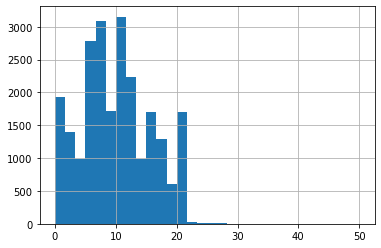

In [44]:
#выбросы выглядят реалистично
data['total_images'].hist(bins=30)
plt.show()

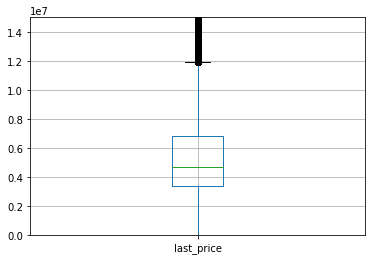

In [45]:
#по столбюцу 'last_price' "коробка с усами" явно указывает нам на выбросы начиная со значений более 11,9 млн:
data.boxplot(['last_price'])
plt.ylim(0, 15000000)
plt.show()

Оставим выбросы по *total_images* и *last_price*. Не будем удалять выбросы по цене более 12 млн. руб. т.к. подобные предложения могут не быть массовыми, но при этом вполне реальными для Санкт-Петербурга.

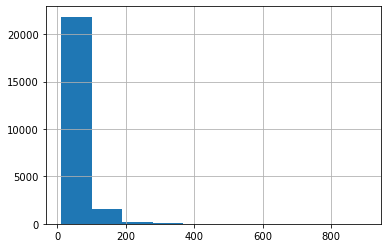

In [46]:
data['total_area'].hist()
plt.show()

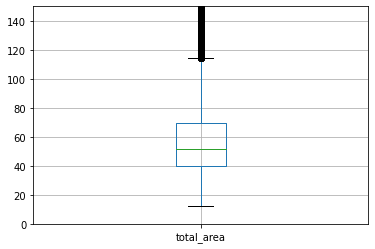

In [47]:
#посмотрим на рекомендации по выбросам по площади
data.boxplot(['total_area'])
plt.ylim(0, 150)
plt.show()

In [48]:
# площадь  более 114 м можно считать выбросами. Удалим данные с такими значениями:
data = data.loc[data['total_area'] <= 114]

In [49]:
#видим ошибку в столбце 'rooms' занчения равные 0. Посмотрим их количество:
len(data[data['rooms']==0])

196

In [50]:
data.groupby('rooms')['living_area'].agg(['mean', 'median', 'count'])

,mean,median,count
rooms,,,
0,18.807857,18.0,196
1,17.857173,17.6,8031
2,31.542973,30.5,7887
3,45.727776,45.0,5423
4,56.985358,57.3,782
5,68.467113,67.5,71
6,80.933333,75.0,9
7,145.000000,145.0,1


Судя по жилой площади это небольшие однокомнатные квартиры, поэтому исправим ошибку заполнения, пропишем количеcтво комнат 1:

In [51]:
data.loc[data['rooms']==0, 'rooms'] = 1

Посмотрим столбец 'floors_total' - вызывает подозрение только 2х комнатная квартира в Кронштадте по умеренной цене в 60ти этажном доме - вероятно это всё-таки 6й этаж:

In [52]:
data[data['floors_total']>50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,proportion_kitchen_area,madian_proportion_kitchen_area
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166,0.162637,0.162569
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45,0.350000,0.170577


In [53]:
#присваиваем этажу значение 6:
data.loc[data['floors_total']==60, 'floors_total'] = 6

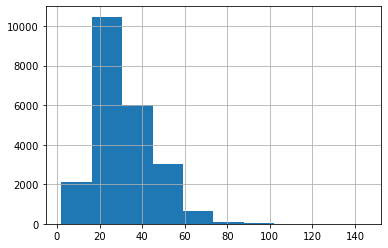

In [54]:
data['living_area'].hist()
plt.show()

(0.0, 150.0)

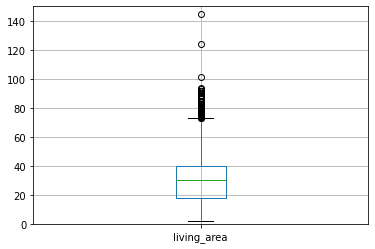

In [55]:
#посмотрим на рекомендации по выбросам по площади
data.boxplot(['living_area'])
plt.ylim(0, 150)

In [56]:
#посмотрим как жилая площадь коррелирует с общей площадью:
data['living_area'].corr(data['total_area'])

0.8910241431674085

Такие выбросы возможны. Жилая площадь коррелирует с общей площадью, поэтому оставим пока как есть.

### Вывод
 - Заполнены пропуски данных там, где это было возможно; 
 - Проведена оптимизация типов данных;
 - В столбце с названиями устранены неявные дубликаты;
 - Устранены редкие и выбивающиеся значения.

### Посчитайте и добавьте в таблицу новые столбцы

In [57]:
#посчитаем цену квадратного метра и добавить соответствующий столбец:
data['price_of_one_square_meter'] = data['last_price'] / data['total_area']

#для удобства просмотра приведем к типу int:
data['price_of_one_square_meter'] = data['price_of_one_square_meter'].astype('int')

In [58]:
#добавим соответствующие столбцы - день недели публикации объявления, месяц и год:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [59]:
#создадим функцию для заполнения нового столбца с типом этажа:
def find_floor(line):
    total_floors = line['floors_total']
    floor = line['floor']
    if floor == total_floors:
        return 'Последний'
    elif floor == 1:
        return 'Первый'
    else:
        return 'Другой'
data['floor_type'] = data.apply(find_floor, axis=1)
data['floor_type'].unique()

array(['Другой', 'Первый', 'Последний'], dtype=object)

In [60]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

In [61]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,proportion_kitchen_area,madian_proportion_kitchen_area,price_of_one_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,0.231481,0.170577,120370,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81,0.272277,0.194972,82920,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,574.0,558,0.148214,0.170577,92785,3,8,2015,Другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,0.410000,0.170577,100000,1,6,2018,Другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,55,0.299342,0.249692,95065,0,9,2018,Другой,NaN


### Вывод

*В таблицу добавлены новые столбцы со следующими параметрами:*
 - 'price_of_one_square_meter' - цена одного квадратного метра;
 - 'weekday' - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - 'month' - месяц публикации объявления;
 - 'year' - год публикации объявления;
 - 'floor_type' - тип этажа квартиры (значения — «первый», «последний», «другой»);
 - 'cityCenters_nearest_km' - расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

**Изучим следующие параметры объектов:**

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

*Построим отдельные гистограммы для каждого из этих параметров:*

**Общая площадь - 'total_area'**

In [62]:
data['total_area'].describe()

count    22400.000000
mean        54.309652
std         19.327330
min         12.000000
25%         39.375000
50%         50.045000
75%         65.500000
max        114.000000
Name: total_area, dtype: float64

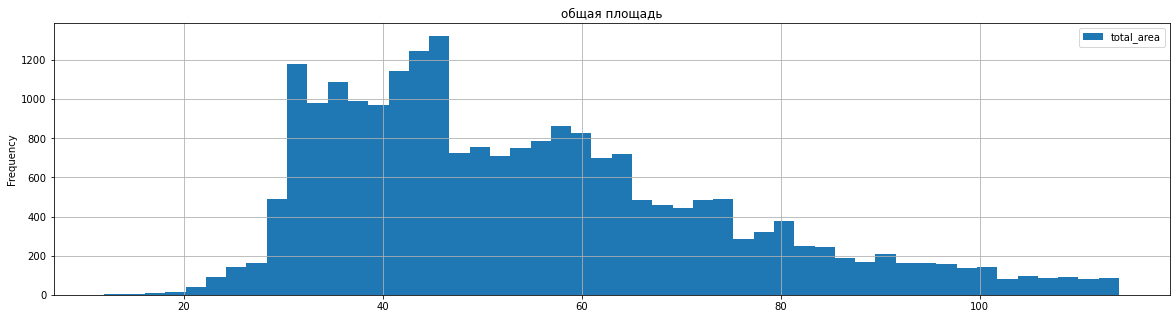

In [63]:
#построим гистограмму для параметра - общая площадь. Будем использовать plot с параметром kind = hist:
data.plot(kind='hist', title='общая площадь', y='total_area', bins=50, grid=True, figsize=(20,5))
plt.show()

Можно сказать, что распределение по общей площади соответствует нормальному распределению. Но, вместе с тем, при возрастании площади можно увидеть пиковые значения при 30, 46, 58, 64, 75 и 80 кв.м. Среднее значение 54 кв.м.

**Жилая площадь - 'living_area'**

In [64]:
data['living_area'].describe()

count    22400.000000
mean        30.989088
std         13.454546
min          2.000000
25%         18.000000
50%         30.000000
75%         40.000000
max        145.000000
Name: living_area, dtype: float64

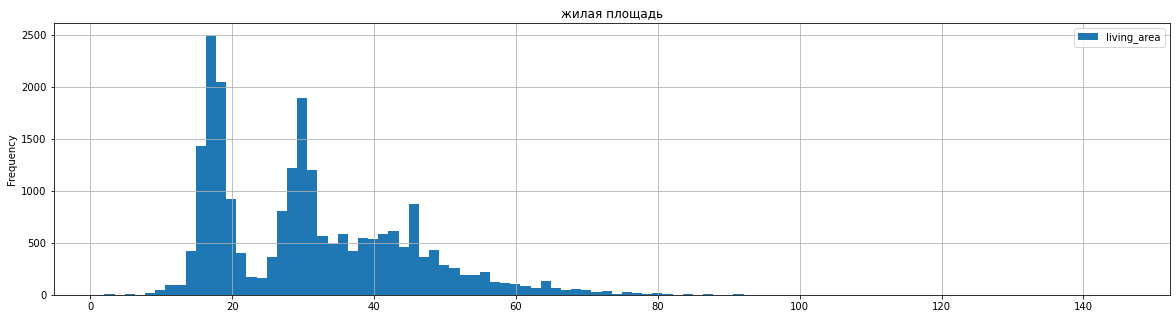

In [65]:
#построим гистограмму для параметра - жилая площадь. Будем использовать plot с параметром kind = hist:
data.plot(kind='hist', title='жилая площадь', y='living_area', bins=100, grid=True, figsize=(20,5))
plt.show()

Общий тренд по жилой площади похож на нормальное распределение. Однако, в нем есть три пика на 18, 30 и 45 кв.м. Каждый отрезок с пиком в отдельности представляют собой нормальное распределение.

**Площадь кухни - 'kitchen_area'**

In [66]:
data['kitchen_area'].describe()

count    22400.000000
mean         9.786372
std          4.292689
min          1.300000
25%          7.000000
50%          9.000000
75%         11.200000
max         55.700000
Name: kitchen_area, dtype: float64

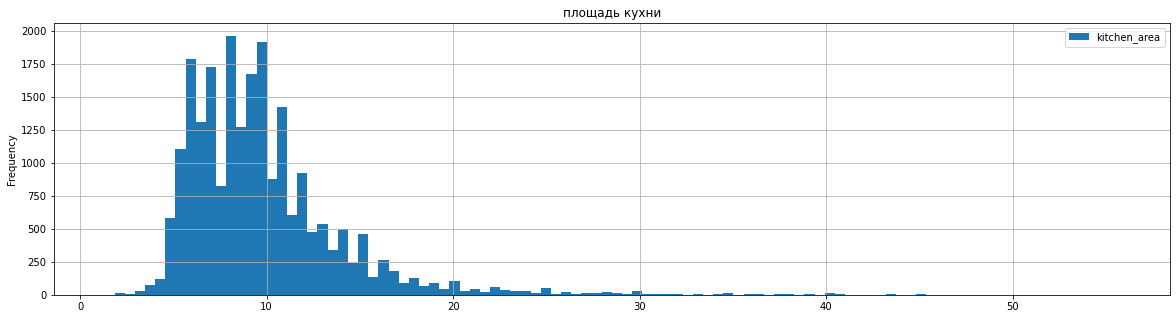

In [67]:
#построим гистограмму для параметра - площадь кухни. Будем использовать plot с параметром kind = hist:
data.plot(kind='hist', title='площадь кухни', y='kitchen_area', bins=100, grid=True, figsize=(20,5))
plt.show()

Распределение площадей кухни близко к нормальному распределению. В основном большинство кухонь площадью до 10 кв. м.

**Цена объекта - 'last_price'**

In [68]:
data['last_price'].describe()

count    2.240000e+04
mean     5.301648e+06
std      3.389581e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.300000e+06
max      8.200000e+07
Name: last_price, dtype: float64

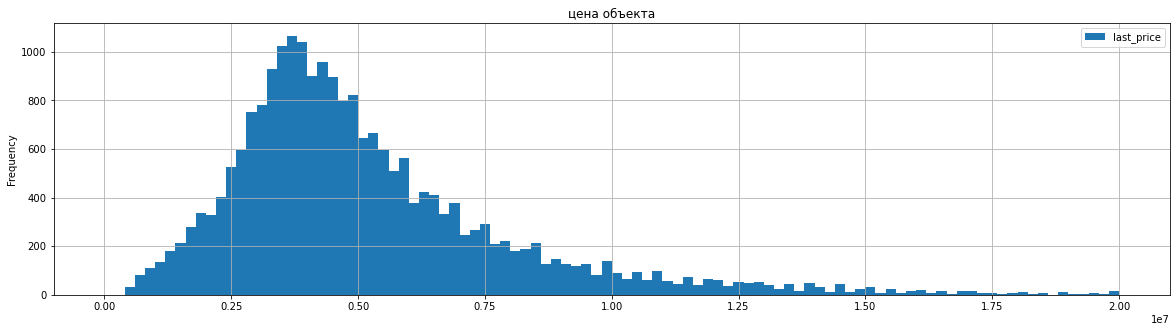

In [69]:
data.plot(kind='hist', title='цена объекта', y='last_price', bins=100, grid=True, figsize=(20,5), range=(0,20000000))
plt.show()

Распределение цены близко к нормальному распределению с максимумом в районе 3х - 4х млн. рублей. Вместе с тем, более медленное снижение плотности распределения по сравнению с ростом говорит о большем количестве недвижмости с высокой ценой.

**Количество комнат - 'rooms'**

In [70]:
data['rooms'].describe()

count    22400.000000
mean         1.955982
std          0.884978
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

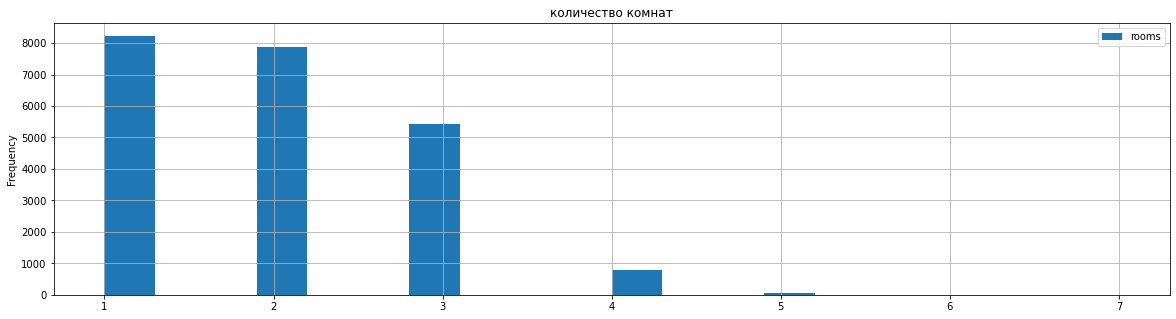

In [71]:
data.plot(kind='hist', title='количество комнат', y='rooms', bins=20, grid=True, figsize=(20,5))
plt.show()

По количеству комнат имеем нормальное распределение. Большинство квартир 1 и 2 комнатные, также немалую долю занимают 3-х комнатные квартиры.

**Высота потолков - 'ceiling_height'**

In [72]:
data['ceiling_height'].describe()

count    22400.000000
mean         2.690820
std          0.247988
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64

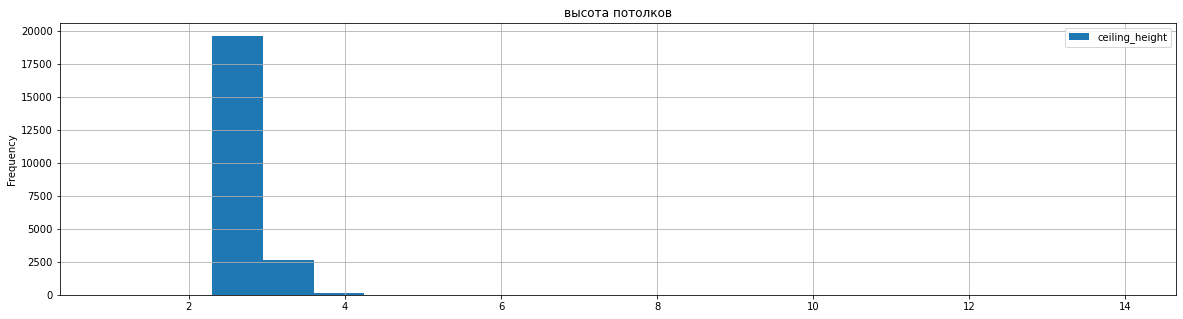

In [73]:
data.plot(kind='hist', title='высота потолков', y='ceiling_height', bins=20, grid=True, figsize=(20,5))
plt.show()

По высоте потолков имеем нормальное распределение. Большинство квартир с типичной высотой 2,6 - 2,7 м.

**Этаж квартиры - 'floor'** 

In [74]:
data['floor'].describe()

count    22400.000000
mean         5.918036
std          4.909655
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

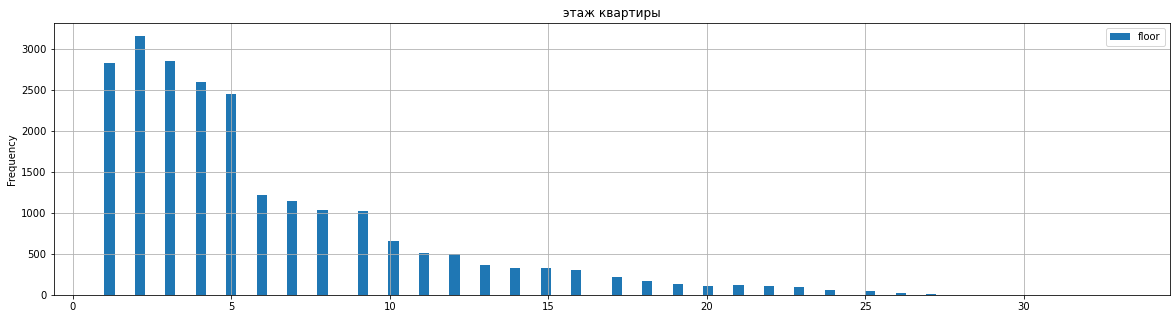

In [75]:
data.plot(kind='hist', title='этаж квартиры', y='floor', bins=100, grid=True, figsize=(20,5))
plt.show()

В распределении по этажности бросается в глаза большое преимущество значений до 5-ти этажей включительно. Что говорит о целом ряде предложений из пятиэтажной застройки. Также прослеживается вторая "ступень значений" от 6 до 9 этажа. Преимущество предложений 5 и 9 этажек подтверждается на диаграмме ниже.

**Всего этажей в доме - 'floors_total'** 

In [76]:
data['floors_total'].describe()

count    22400.000000
mean        10.791562
std          6.621939
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

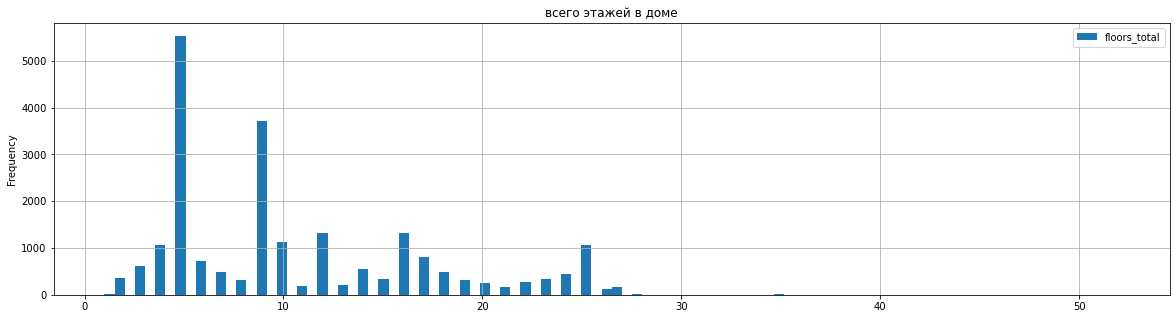

In [77]:
data.plot(kind='hist', title='всего этажей в доме', y='floors_total', bins=100, grid=True, figsize=(20,5))
plt.show()

Можно сделать вывод о том, что большинство предложений продажи квартир из типовых построек 5-ти и 9-ти этажных домов.

**Тип этажа квартиры - 'floor_type'** 

In [78]:
data['floor_type'].describe()

count      22400
unique         3
top       Другой
freq       16475
Name: floor_type, dtype: object

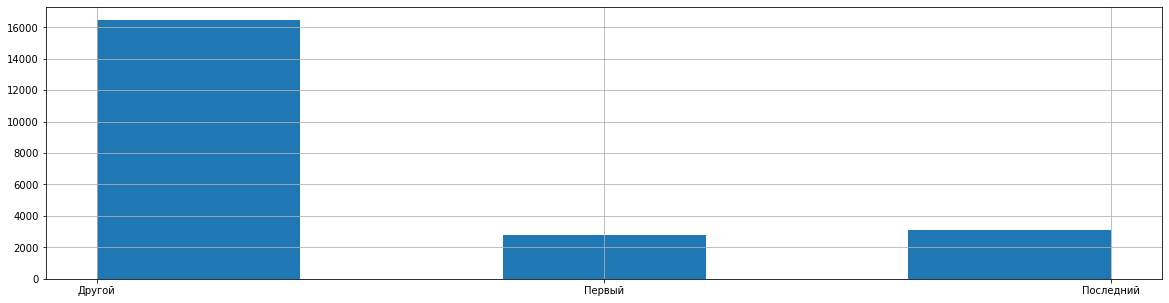

In [79]:
data['floor_type'].hist(bins=5, grid=True, figsize=(20,5))
plt.show()

Полученные данные корректны.

**Расстояние до центра города в метрах - 'cityCenters_nearest'**

In [80]:
data['cityCenters_nearest'].describe()

count    16936.000000
mean     14634.150626
std       8512.186066
min        208.000000
25%      10107.000000
50%      13356.000000
75%      16518.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

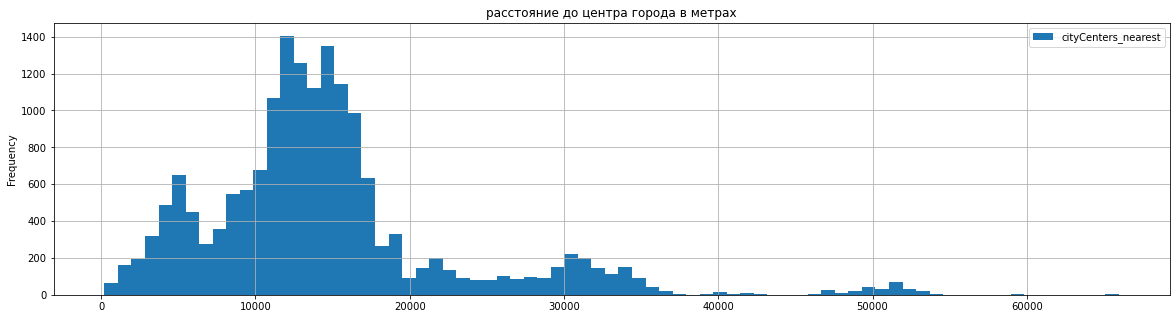

In [81]:
data.plot(kind='hist', title='расстояние до центра города в метрах', y='cityCenters_nearest', \
          bins=75, grid=True, figsize=(20,5))
plt.show()

На диаграмме распределения расстояния до центра города мы видим несколько пиков. Вероятно, это указывает на неравномерность плотности жилой застройки.

**Расстояние до ближайшего аэропорта - 'airports_nearest'**

In [82]:
data['airports_nearest'].describe()

count    16918.000000
mean     28862.286559
std      12842.896073
min          0.000000
25%      18272.500000
50%      26995.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

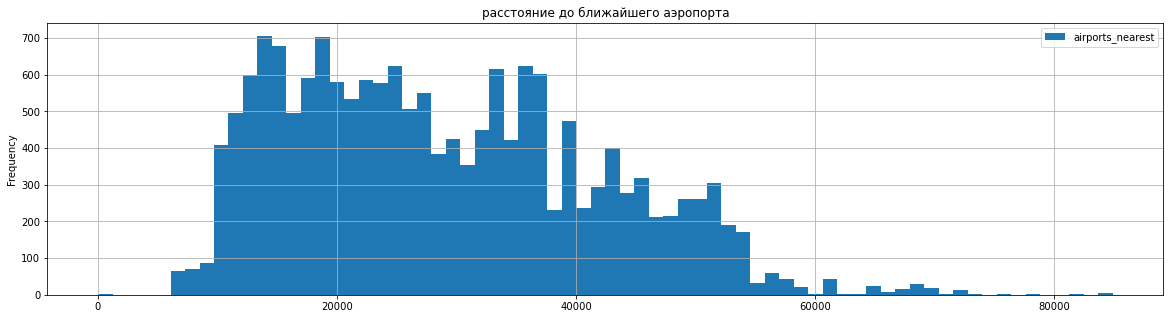

In [83]:
data.plot(kind='hist', title='расстояние до ближайшего аэропорта', y='airports_nearest', \
                  bins=70, grid=True, figsize=(20,5))
plt.show()

Похоже на нормальное распределение, с некоторыми пиками, которые можно объяснить также плотностью застройки в том или ином районе.

**Расстояние до ближайшего парка - 'parks_nearest'**

In [84]:
data['parks_nearest'].describe()

count    7260.000000
mean      494.792287
std       343.551306
min         1.000000
25%       289.000000
50%       457.000000
75%       616.250000
max      3190.000000
Name: parks_nearest, dtype: float64

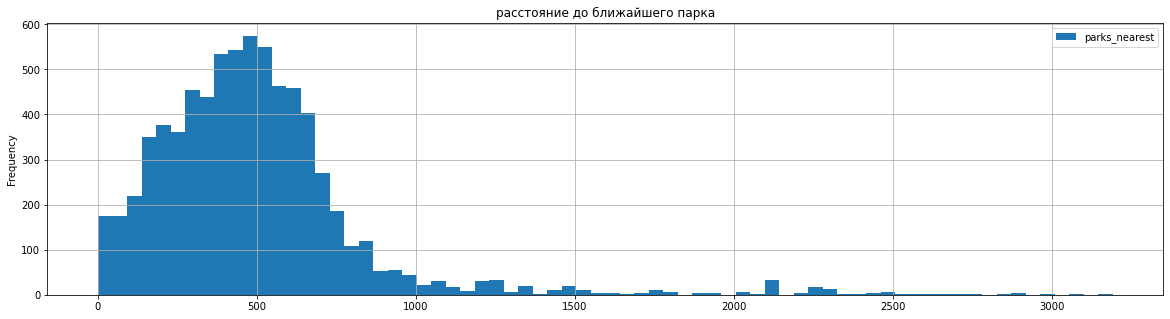

In [85]:
data.plot(kind='hist', title='расстояние до ближайшего парка', y='parks_nearest', \
                  bins=70, grid=True, figsize=(20,5) )
plt.show()

Значения расстояний до парка имеют нормальное распределение.

**День публикации объявления - 'weekday'**

In [86]:
data['weekday'].describe()

count    22400.000000
mean         2.570357
std          1.792972
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

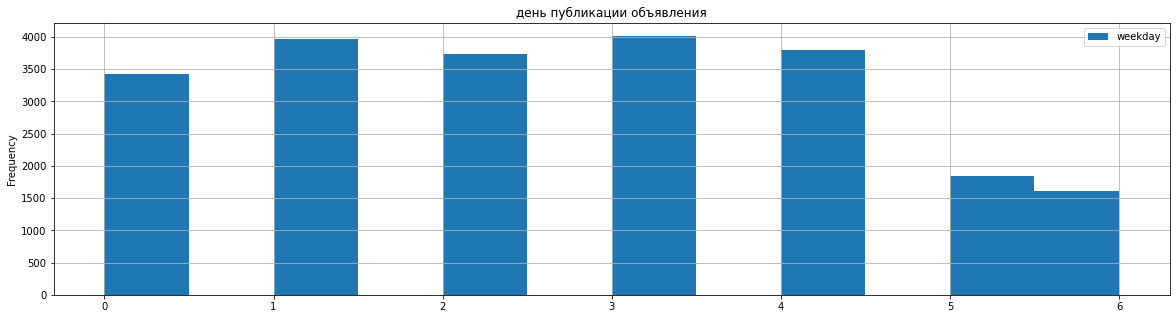

In [87]:
data.plot(kind='hist', title='день публикации объявления', y='weekday', \
                  bins=12, grid=True, figsize=(20,5) )
plt.show()

Можно сделать вывод, что большинство публикаций объявлений о продаже квартир приходится на рабочие дни.

**Месяц публикации объявления - 'month'**

In [88]:
data['month'].describe()

count    22400.000000
mean         6.397634
std          3.488869
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

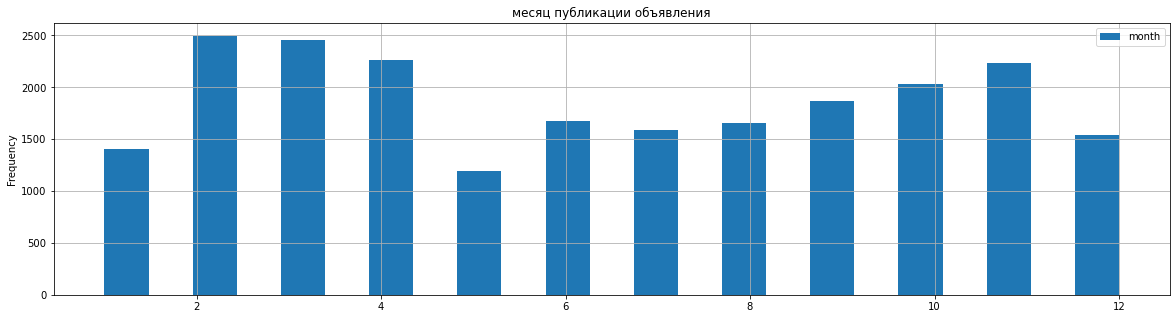

In [89]:
data.plot(kind='hist', title='месяц публикации объявления', y='month', \
                  bins=23, grid=True, figsize=(20,5) )
plt.show()

Можно сделать вывод о пиках сезонности подачи объявлений. Первый пик февраль-март, второй пик октябрь-ноябрь.

**Изучим, как быстро продавались квартиры (столбец 'days_exposition'):**

In [90]:
data['days_exposition'].describe()

count    22400.000000
mean       164.692500
std        200.848892
min          1.000000
25%         45.000000
50%         95.000000
75%        193.000000
max       1580.000000
Name: days_exposition, dtype: float64

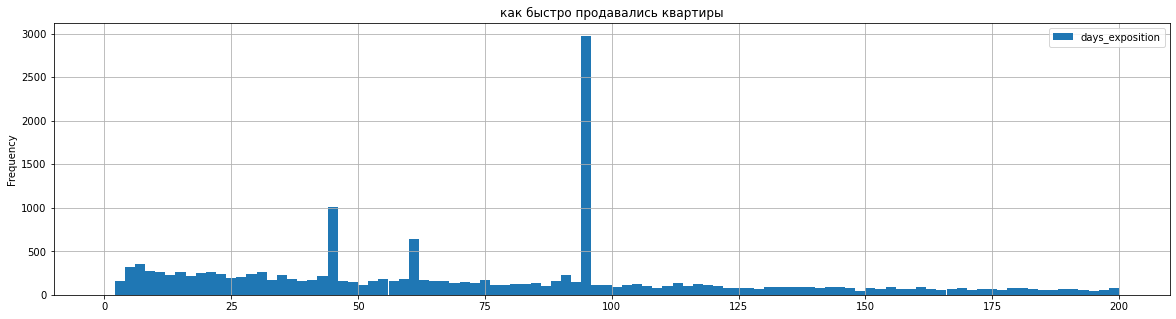

In [91]:
data.plot(kind='hist', title='как быстро продавались квартиры', y='days_exposition', \
                  bins=100, grid=True, figsize=(20,5), range=(0,200))
plt.show()

In [92]:
print('Среднее количество дней продажи:', data['days_exposition'].mean())
print('Медиана по дням продажи:', data['days_exposition'].median())

Среднее количество дней продажи: 164.6925
Медиана по дням продажи: 95.0


Медиана по дням продажи почти в два раза ниже среднего значения. Очевидно влияние выбросов многолетних продаж элитной недвижимости на среднее значение.

<AxesSubplot:>

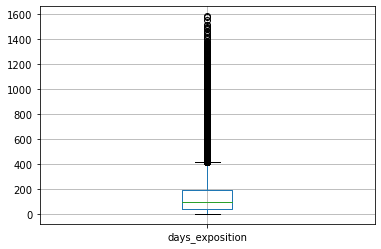

In [93]:
data.boxplot(['days_exposition'])
#plt.ylim(0, 1600)

Величина стандартного отклонения показывает большой разброс данных по дням продажи. По квартилям можно сделать вывод что относительно быстрой продажей можно считать период от 45 до 95 дней. Менее 45 дней - это очень быстро. Продажи более 193 дней можно считать необычно долгими. Продажи от 95 до 193 дней можно назвать относительно медленным периодом реализации.

Видны пики на значениях 45 и 60 дней. Вероятно это связано тем, что через 1.5 - 2 месяца безуспешных продаж продавец снижает цену и находит клиента. Большинство квартир продавалось за 95 дней.

**Проанализируем факторы влияющие на общую стоимость объекта:**

*Посмотрим, зависит ли цена от:*

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров:

**Зависимость цены от общей площади:**

In [94]:
#посмотрим на коэффициент корреляции:
data['last_price'].corr(data['total_area']) 

0.6811401782660357

Коэффициент корреляции Пирсона = 0,68, что подтверждает наличие зависимости данных величин.

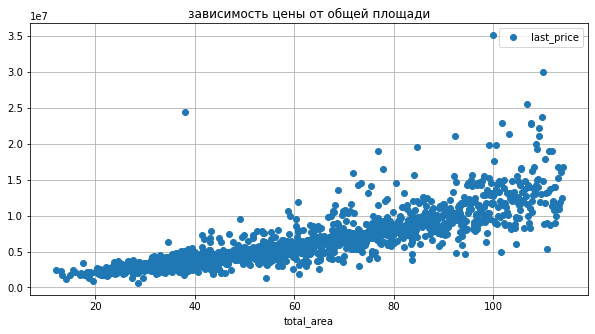

In [95]:
#с помощью сводной таблицы отобразим график зависимости 2-х величин:
data.pivot_table(index='total_area', values='last_price')\
.plot(title='зависимость цены от общей площади', grid=True, style='o', figsize=(10, 5))
plt.show()

По графику можно сделать вывод - чем больше общая площадь, тем больше цена, хотя и разброс цен также растет с увеличением общей площади. Видим несколько аномальных значений, выбивающиеся из общей массы. Это очень дорогие квартиры малой жилой площади, возможно находящиеся в историческом центре города.

In [96]:
data[(data['total_area']<40)&(data['last_price']>20000000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,proportion_kitchen_area,madian_proportion_kitchen_area,price_of_one_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
4859,16,28000000,33.00,2019-04-29,1,3.5,5,17.60,2,False,...,119.0,95,NaN,0.170577,848484,0,4,2019,Другой,1.0
17172,14,28000000,33.00,2019-04-30,1,3.5,5,17.60,2,False,...,27.0,95,NaN,0.170577,848484,1,4,2019,Другой,1.0
21238,1,24412900,38.12,2018-06-27,1,2.6,10,16.83,4,False,...,NaN,44,0.280693,0.183639,640422,2,6,2018,Другой,NaN


**Зависимость цены от жилой площади:**

In [97]:
#посмотрим на коэффициент корреляции:
data['living_area'].corr(data['last_price']) 

0.5247261339040553

Коэффициент корреляции Пирсона = 0,52, что подтверждает наличие зависимости данных величин.

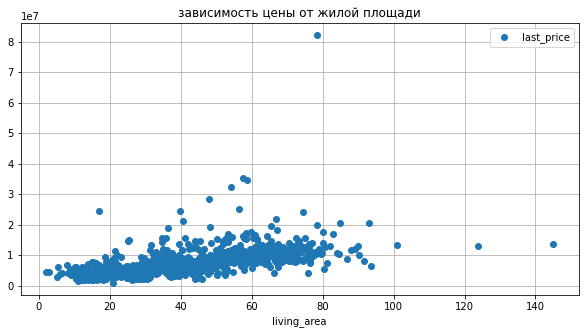

In [98]:
#с помощью сводной таблицы отобразим график зависимости 2-х величин:
data.pivot_table(index='living_area', values='last_price')\
.plot(title='зависимость цены от жилой площади', grid=True, style='o', figsize=(10, 5))
plt.show()

По графику можно сделать вывод - чем больше жилая площадь, тем больше цена, хотя и разброс цен также растет с увеличением жилой площади.

**Зависимость цены от площади кухни:**

In [99]:
#посмотрим на коэффициент корреляции:
data['last_price'].corr(data['kitchen_area']) 

0.5369392645368584

Коэффициент корреляции Пирсона = 0,53, что подтверждает наличие зависимости данных величин.

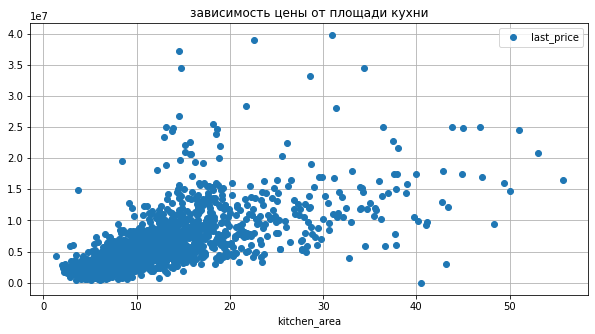

In [102]:
#с помощью сводной таблицы отобразим график зависимости 2-х величин:
data.pivot_table(index='kitchen_area', values='last_price')\
    .plot(title='зависимость цены от площади кухни', grid=True, style='o', figsize=(10, 5))
plt.show()

По графику можно сделать вывод - чем больше площадь кухни, тем больше цена, хотя и разброс цен также растет с увеличением жилой площади.

**Зависимость цены от количества комнат:**

In [103]:
#посмотрим на коэффициент корреляции:
data['last_price'].corr(data['rooms']) 

0.3835756822909059

Коэффициент корреляции Пирсона = 0,38, что подтверждает наличие зависимости данных величин, хотя и меньше, чем в предыдущих пунктах.

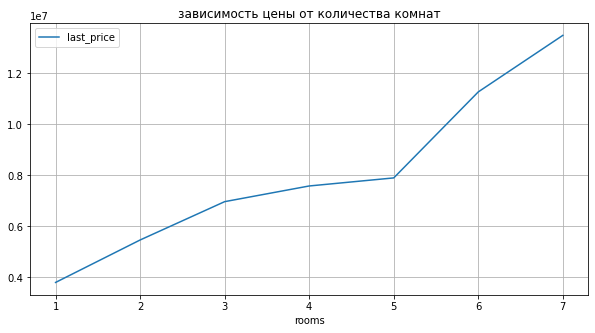

In [104]:
#с помощью сводной таблицы отобразим график зависимости 2-х величин:
data.pivot_table(index='rooms', values='last_price')\
.plot(title='зависимость цены от количества комнат', grid=True, style='-', figsize=(10, 5))
plt.show()

По графику можно сделать вывод - чем больше количество комнат, тем больше цена, хотя и коэффициент корреляции Пирсона показывает слабую зависимость.

**Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):**

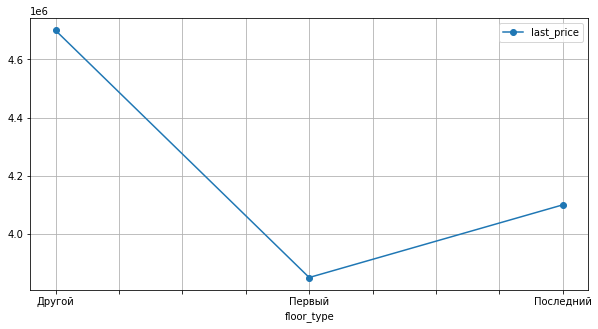

In [105]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(10, 5))
plt.show()

Анализ медианных значений показвает наиболее низкую стоимость первых этажей, а также снижение стоимости последних этажей по сравнению с остальными.

**Зависимость цены от даты размещения (день недели, месяц, год):**

In [106]:
#посмотрим на коэффициент корреляции цены с днем недели подачи объявления:
data['last_price'].corr(data['weekday']) 

-0.015666334332909163

<function matplotlib.pyplot.show(close=None, block=None)>

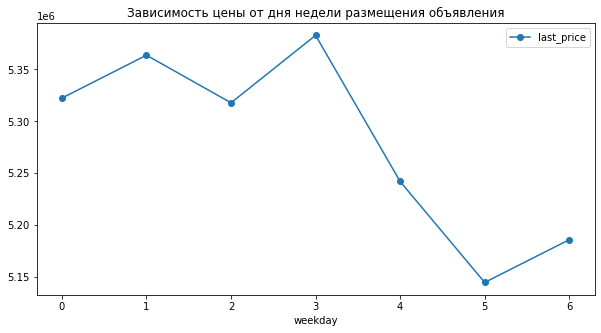

In [107]:
data.pivot_table(index='weekday', values='last_price').\
plot(style='o-',title='Зависимость цены от дня недели размещения объявления', figsize=(10,5))
plt.show

Очевидно, что анализ показал полное отсутствие зависимости цены от дня недели размещения объявления.

In [108]:
#посмотрим на коэффициент корреляции с месяцем подачи объявления:
data['last_price'].corr(data['month']) 

-9.693962439741652e-05

<function matplotlib.pyplot.show(close=None, block=None)>

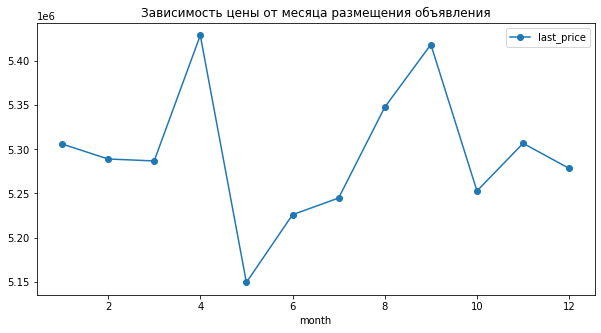

In [109]:
data.pivot_table(index='month', values='last_price').\
plot(style='o-',title='Зависимость цены от месяца размещения объявления', figsize=(10,5))
plt.show

Коэффициент корреляции показывает отсутствие зависимости цены от месяца подачи объявления. Вместе с тем на графике зависимости прослеживается сезонность. Видны пики повышения стоимости в апреле, сентябре. В мае и октябре заметен спад цен.

In [110]:
#посмотрим на коэффициент корреляции с годом подачи объявления:
data['last_price'].corr(data['year']) 

-0.010603650605716709

<function matplotlib.pyplot.show(close=None, block=None)>

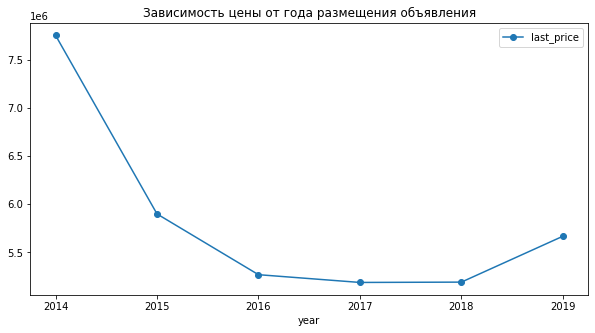

In [111]:
data.pivot_table(index='year', values='last_price').\
plot(style='o-',title='Зависимость цены от года размещения объявления', figsize=(10,5))
plt.show

Коэффициент корреляции показывает отсутствие зависимости цены от года подачи объявления. Отрицательная динамика цен по годам скорее обусловлена изменением других показателей, например, снижением площади продаваемых квартир. Проверим эту гипотезу и построим графики изменения площадей квартир по годам:

<function matplotlib.pyplot.show(close=None, block=None)>

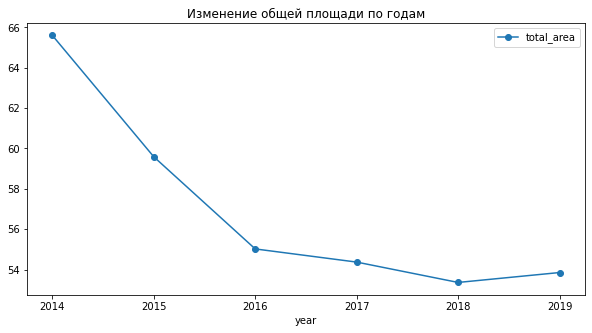

In [112]:
data.pivot_table(index='year', values='total_area').\
plot(style='o-',title='Изменение общей площади по годам', figsize=(10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

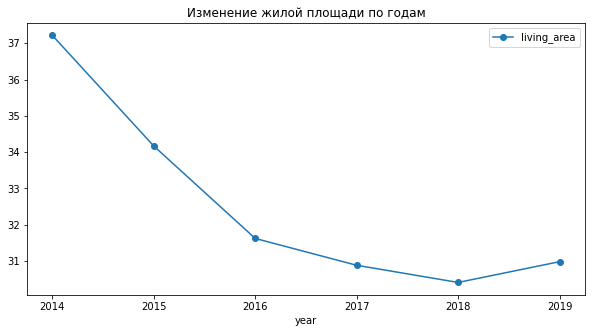

In [113]:
data.pivot_table(index='year', values='living_area').\
plot(style='o-',title='Изменение жилой площади по годам', figsize=(10,5))
plt.show

На графиках видно четкое снижение площади продаваемых квартир по годам и также небольшое повышение с 2018 по 2019 года. Однозначно можно сказать, что снижение цены продаваемых квартир по годам связано с общим уменьшением площади продаваемых квартир. 

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:**

In [114]:
data.pivot_table(index='locality_name', values='price_of_one_square_meter', aggfunc=['count', 'mean', 'median']) \
.sort_values(('count', 'price_of_one_square_meter'), ascending=False)\
.head(10)\
.sort_values(('mean', 'price_of_one_square_meter'), ascending=False)

,count,mean,median
,price_of_one_square_meter,price_of_one_square_meter,price_of_one_square_meter
locality_name,,,
Санкт-Петербург,14568,110728.993273,103921.0
Пушкин,347,101959.930836,99650.0
деревня Кудрово,298,92409.265101,91831.5
поселок Парголово,326,90331.840491,91779.5
поселок поселок Мурино,556,85681.305755,85878.0
поселок Шушары,437,78704.434783,76829.0
Колпино,336,75369.595238,74723.5
Гатчина,304,68919.016447,67860.0


10 населенных пунктов с наибольшим количеством объявлений: *Санкт-Петербург, Пушкин, деревня Кудрово, поселок Парголово, поселок поселок Мурино, поселок Шушары, Колпино, Гатчина, Всеволожск, Выборг*. Макимальная средняя стоимость квадратного метра в *Санкт-Петербурге*, минимальная средняя стоимость  квадратного метра в *Выборге*.

**Как стоимость объектов зависит от расстояния до центра города:**

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра:

In [115]:
data.pivot_table(index='cityCenters_nearest_km', values='price_of_one_square_meter', aggfunc='mean')

,price_of_one_square_meter
cityCenters_nearest_km,
0.0,222443.117647
1.0,149432.830882
2.0,143612.164384
3.0,122254.941818
4.0,129312.153558
...,...
61.0,60606.000000
62.0,69114.000000
63.0,62500.000000


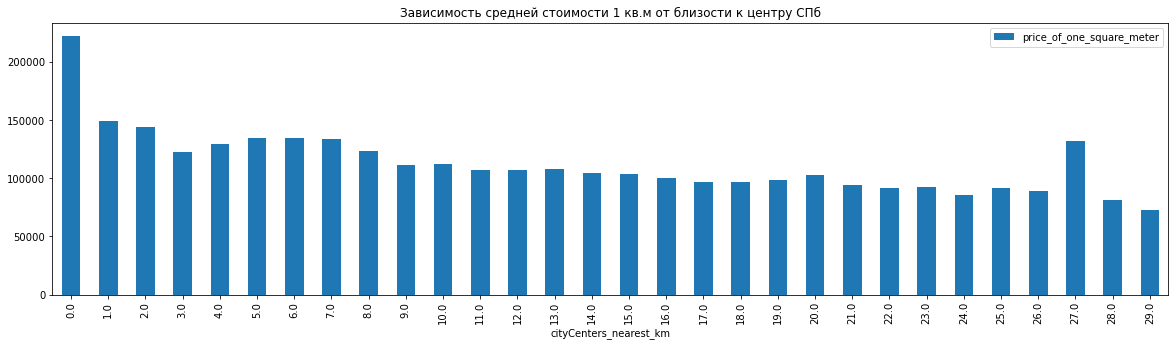

In [116]:
data[data['locality_name']=='Санкт-Петербург']\
.pivot_table(index='cityCenters_nearest_km', values='price_of_one_square_meter', aggfunc='mean')\
.plot(kind='bar', title='Зависимость средней стоимости 1 кв.м от близости к центру СПб', figsize=(20,5))
plt.show()

Получена очевидная картина снижения средней стоимости недвижимости при удаления от центра. Ярко выражен резкий рост стоимости в самом центре от 2-х до 0 км. Вместе с тем, можно отметить снижение стоимости на расстоянии 3х км, и один из пиков стоимости для 6-ти, 7-ми км от центра. Также виден пик роста цен на расстоянии 27 км от центра.

### Вывод

Проведя анализ данных по зависимостям цены за квадратный метр по отношению к другим факторам имеются следующие выводы:

- Наиболее популярны квартиры стоимостью 80 тыс. +- 20 тыс. за кв.м. одно-двух-комнатные, потолком в 2.7 метра и планировкой от 40 до 80 кв.м, не на первом и не на последнем этаже.
- Основные продажи квартир случаются через 45 - 193 дней.
- На стоимость квартиры положительно влияет общая и жилая площади, а также площадь кухни, количество комнат, близость к центру.
- Квартиры в Санкт-Петербурге имеют самую большую стоимость и самую большую стоимость за кв.м.
- В центре квартиры в целом дороже и их цена оправдана их местоположением.


### Общий вывод

<div style="border:solid green 2px; padding: 40px">
    
**В данном исследовании проделаны следующие шаги:**

1. Были определены аномалии и обработаны наиболее подходящим образом.
2. Построена стратегия замены пропусков с последующим их заполнением, с целью сохранения максимального количества данных и их влияния на гипотезы.
3. Заменены типы данных на необходимые для удобной работы. 
4. Созданы дополнительные столбцы для улучшения анализа данных, а именно:
    - цена квадратного метра жилья; 
    - дни недели, месяцы и года размещения объявлений; 
    - категории по этажам квартир;
    - расстояние до центра города в километрах.
5. Проведен исследовательский анализ данных, который показал что для определения рыночной стоимости объектов недвижимости важны следующие параметры:
    - общая и жилая площади квартиры;
    - площадь кухни;
    - количество комнат;
    - этаж (не первый и не последний);
    - расположение квартиры или удаленность от центра города.

*Кроме того, необходимо дать обратную связь разработчикам о полученных ошибках в выгрузке (большое количество пропусков в картографических данных скорее всего говорит о некорректности работы системы). Также стоит установить ограничение на ввод высоты потолков в рамках стандартов и поставить ограничение на дальнейшее заполнение данных пока не будут указаны все необходимые, обязательные данные, такие как площадь или количество комнат, этаж.*